In [3]:
import pandas as pd
import nltk
from nltk import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS



In [2]:
df = pd.read_csv("dataset_final_1.csv")

In [13]:
len(df)

5647

<AxesSubplot: >

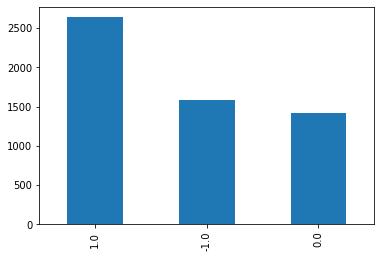

In [14]:
df['sentiment'].value_counts().plot.bar(figsize = (6, 4))

In [3]:
df.dropna(subset = ["feedback"], inplace=True) # drop those rows which have NaN value cells
df = df.reset_index(drop = True)


In [16]:
len(df)

5645

In [17]:
df.head()

,stu_id,year,dept,feedback,sentiment
0,19104001,BE,IT,The lectures were engaging,1.0
1,19104002,BE,IT,The course material was poorly organized,-1.0
2,19104003,BE,IT,The professor was knowledgeable and approachable,1.0
3,19104004,BE,IT,The workload was manageable,0.0
4,19104005,BE,IT,The facilities were outdated and cramped,-1.0


In [18]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # add additional stop words to remove

In [19]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [20]:
df['clean'] = df['feedback'].apply(preprocess)

In [21]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [22]:
df.head()

,stu_id,year,dept,feedback,sentiment,clean,clean_joined
0,19104001,BE,IT,The lectures were engaging,1.0,"[lectures, engaging]",lectures engaging
1,19104002,BE,IT,The course material was poorly organized,-1.0,"[course, material, poorly, organized]",course material poorly organized
2,19104003,BE,IT,The professor was knowledgeable and approachable,1.0,"[professor, knowledgeable, approachable]",professor knowledgeable approachable
3,19104004,BE,IT,The workload was manageable,0.0,"[workload, manageable]",workload manageable
4,19104005,BE,IT,The facilities were outdated and cramped,-1.0,"[facilities, outdated, cramped]",facilities outdated cramped


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.feedback, df.sentiment, test_size = 0.2)

In [24]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [26]:
print(y_train)

0      -1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
4511    1.0
4512    1.0
4513    1.0
4514    0.0
4515    1.0
Name: sentiment, Length: 4516, dtype: float64


In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

pac_classifier = PassiveAggressiveClassifier()
pac_classifier.fit(tfid_x_train,y_train)
y_pred = pac_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
pac_score = round(score*100,2)
print(f'Accuracy: {pac_score}%')

Accuracy: 82.64%


In [28]:
from sklearn.naive_bayes import MultinomialNB 
nb_classifier = MultinomialNB()
nb_classifier.fit(tfid_x_train,y_train)
y_pred = nb_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
nb_score = round(score*100,2)
print(f'Accuracy: {nb_score}%')

Accuracy: 80.78%


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knc_classifier=KNeighborsClassifier()
knc_classifier.fit(tfid_x_train,y_train)
y_pred = knc_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
knc_score = round(score*100,2)
print(f'Accuracy: {knc_score}%')

Accuracy: 77.77%


In [30]:
from sklearn.linear_model import LogisticRegression
lr_classifier=LogisticRegression()
lr_classifier.fit(tfid_x_train,y_train)
y_pred = lr_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
lr_score = round(score*100,2)
print(f'Accuracy: {lr_score}%')

Accuracy: 82.82%


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier=DecisionTreeClassifier()
dtc_classifier.fit(tfid_x_train,y_train)
y_pred = dtc_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
dtc_score = round(score*100,2)
print(f'Accuracy: {dtc_score}%')

Accuracy: 81.93%


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier=RandomForestClassifier()
rfc_classifier.fit(tfid_x_train,y_train)
y_pred = rfc_classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
rfc_score = round(score*100,2)
print(f'Accuracy: {rfc_score}%')

Accuracy: 84.41%


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [5]:
sa = SentimentIntensityAnalyzer()
def vader(text1):
    return sa.polarity_scores(text=text1)

In [6]:
df['sentiment_vader'] = df['feedback'].apply(vader)

In [7]:
df['sentiment_vader']

0       {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
5640    {'neg': 0.031, 'neu': 0.872, 'pos': 0.098, 'co...
5641    {'neg': 0.104, 'neu': 0.841, 'pos': 0.055, 'co...
5642    {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...
5643    {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...
5644    {'neg': 0.035, 'neu': 0.846, 'pos': 0.119, 'co...
Name: sentiment_vader, Length: 5645, dtype: object

In [8]:
df['sentiment_vader'][1]['compound']

0.0

In [9]:
feature3 = [df['sentiment_vader'][i]['compound'] for i in range(len(df.sentiment))]

In [12]:
print(feature3[1])

0.0


In [31]:
df['sentiment_vader_1'] = 0

In [32]:
for i in range(len(df)):
    if feature3[i] == 0:
        df['sentiment_vader_1'][i] = "0.0"
    elif feature3[i] >= 0.5:
        df['sentiment_vader_1'][i] = "1.0"
    elif feature3[i] <= 0.5:
        df['sentiment_vader_1'][i] = "-1.0"

C:\Users\Abdul Samad\AppData\Local\Temp\ipykernel_24180\1234628831.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_vader_1'][i] = "-1.0"


In [33]:
df

,stu_id,year,dept,feedback,sentiment,sentiment_vader,sentiment_vader_1
0,19104001,BE,IT,The lectures were engaging,1.0,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",-1.0
1,19104002,BE,IT,The course material was poorly organized,-1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,19104003,BE,IT,The professor was knowledgeable and approachable,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,19104004,BE,IT,The workload was manageable,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,19104005,BE,IT,The facilities were outdated and cramped,-1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
...,...,...,...,...,...,...,...
5640,19102096,BE,COMPS,The speaker was well-prepared and knowledgeabl...,-1.0,"{'neg': 0.031, 'neu': 0.872, 'pos': 0.098, 'co...",1.0
5641,19102097,BE,COMPS,The online session on how to ace technical int...,-1.0,"{'neg': 0.104, 'neu': 0.841, 'pos': 0.055, 'co...",-1.0
5642,19102098,BE,COMPS,The speaker was engaging and kept my attention...,0.0,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",1.0
5643,19102099,BE,COMPS,The online session on how to ace technical int...,0.0,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",1.0


In [34]:
a = df.sentiment
a

0       1.0
1      -1.0
2       1.0
3       0.0
4      -1.0
       ... 
5640   -1.0
5641   -1.0
5642    0.0
5643    0.0
5644    0.0
Name: sentiment, Length: 5645, dtype: float64

In [35]:
b = df.sentiment_vader_1
b

0       -1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
5640     1.0
5641    -1.0
5642     1.0
5643     1.0
5644     1.0
Name: sentiment_vader_1, Length: 5645, dtype: object

In [37]:
from sklearn.metrics import accuracy_score
score = accuracy_score(b,a)
# vader_score = round(score*100,20)
print(f'Accuracy: {score}%')

Accuracy: 0.0%
